<a href="https://colab.research.google.com/github/irahanjose/Aprendizaje-de-M-quina-con-Python/blob/main/regresion_lineal_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: implementación desde cero en Python

## 1. Configuración Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ruta = '/gdrive/MyDrive/Colab Notebooks/01_2021-07-FundamentosDL/1.4/dataset.csv'

## 2. Lectura y visualización del set de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)

In [ ]:
data = pd.read_csv(ruta)

In [ ]:
data.head()

,Area,Precio
0,152.272727,65928.86015
1,102.272727,44477.41849
2,222.727273,95848.62198
3,79.545455,44964.89827
4,86.363636,34367.39122


In [ ]:
data.shape

(100, 2)

In [ ]:
x1 = data['Area'].values
y = data['Precio'].values

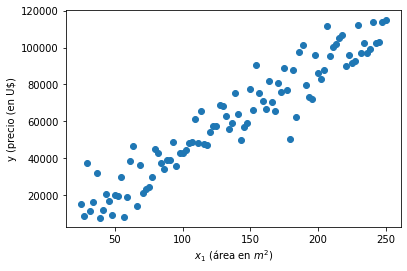

In [ ]:
plt.scatter(x1,y)
plt.xlabel('$x_1$ (área en $m^2)$')
plt.ylabel('y (precio (en U$)');

## 3. Funciones para construir el modelo lineal

###3.1 Pérdida

$L(\omega ,b)=\frac{1}{2m}\sum_{i=1}^m [w x_1^{(i)}+b-y^{(i)}]^2$

In [ ]:
def calcular_perdida(x,y,w,b,m):
	errores_individuales = np.square([w*x+b-y])
	perdida = np.sum(errores_individuales)/(2*m)

	return perdida

### 3.2 Gradiente descendente

Los parámetros (coeficientes) se actualizan así:

$\omega \leftarrow \omega - \alpha \frac{\partial L(\omega ,b)}{\partial \omega}$

$b \leftarrow b - \alpha \frac{\partial L(\omega ,b)}{\partial b}$

donde las derivadas parciales son:

$\frac{\partial L(\omega ,b)}{\partial \omega} = \frac{1}{m} \sum_{i=1}^m x_1^{(i)} [w \cdot x_1^{(i)} + b - y^{(i)}]$

$\frac{\partial L(\omega ,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^m [w \cdot x_1^{(i)} + b - y^{(i)}]$

In [ ]:
def gradiente_descendente(w,b,alpha,x,y,m):
  # dL_w y dL_b
  dL_w = np.sum(x*(w*x+b-y))/m
  dL_b = np.sum(w*x+b-y)/m

  # Actualización de pesos
  w = w - alpha*dL_w
  b = b - alpha*dL_b

  return w,b

### 3.3 Predicción con el modelo ya entrenado

$\hat{y} = w \cdot x_1 + b$

In [ ]:
def predecir(x,w,b):
	y_pred = w*x + b

	return y_pred

## 4. Entrenamiento

In [ ]:
# Modificar estos hiper-parámetros para observar diferentes comportamientos

nits = 20				# Número de iteraciones
alpha = 0.00001 # Tasa de aprendizaje (0.00001)


In [ ]:
def entrenar(x,y,nits,alpha):
	m = x.shape[0] 	# Número de datos de entrenamiento

	# Inicializar pesos (acá np.random.seed(100) garantiza que siempre inicializo en los mismos valores)
	w = np.random.rand()
	b = np.random.rand()

	# Pérdida inicial
	perdida = []
	perdida_i = calcular_perdida(x,y,w,b,m)
	perdida.append(perdida_i)

	# Imprimir valores iniciales
	print('Inicialización. '  + 'Loss: '
			+ str(perdida_i) + ', w: ' + str(w) + ', b: ' + str(b))

	# Entrenamiento
	for it in range(nits):
		# Aplicar gradiente descendente
		w, b = gradiente_descendente(w,b,alpha,x1,y,m)

		# Actualizar pérdida
		perdida_it = calcular_perdida(x1,y,w,b,m)
		perdida.append(perdida_it)

		# Imprimir en pantalla
		print('Iteración: ' + str(it) + '. ' + 'Loss: '
			+ str(perdida_it) + ', w: ' + str(w) + ', b: ' + str(b))

	return w, b, perdida

In [ ]:
# Ejecutar entrenamiento
w, b, perdida = entrenar(x1,y,nits,alpha)

Inicialización. Loss: 2341164322.665721, w: 0.6707490847267786, b: 0.8258527551050476
Iteración: 0. Loss: 1.0026306821138152e+18, w: 9295041.687019069, b: 55191.44718089758
Iteración: 1. Loss: 4.374956086891147e+26, w: -194154252804.1562, b: -1150200615.2540967
Iteración: 2. Loss: 1.909002098629283e+35, w: 4055676092582926.5, b: 24026473819727.17
Iteración: 3. Loss: 8.329887066730871e+43, w: -8.471876506820248e+19, b: -5.018875138097e+17
Iteración: 4. Loss: 3.634727200892658e+52, w: 1.7696850021647324e+24, b: 1.0483896988438677e+22
Iteración: 5. Loss: 1.58600491448125e+61, w: -3.696683968853368e+28, b: -2.1899747062818685e+26
Iteración: 6. Loss: 6.920496229100536e+69, w: 7.72198009750971e+32, b: 4.5746245117089807e+30
Iteración: 7. Loss: 3.019742727131439e+78, w: -1.6130396087072517e+37, b: -9.555904624423149e+34
Iteración: 8. Loss: 1.3176578436266858e+87, w: 3.369468382983193e+41, b: 1.9961269598705996e+39
Iteración: 9. Loss: 5.749569912931707e+95, w: -7.038461500038632e+45, b: -4.169

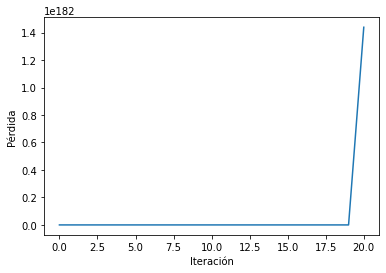

In [ ]:
# Dibujar comportamiento del error
plt.plot(perdida)
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()

Text(0, 0.5, 'y (precio (en U$)')

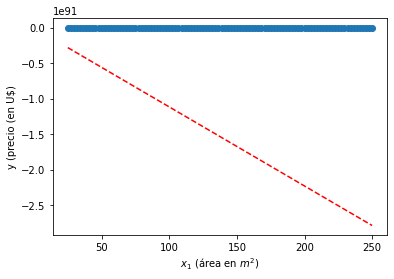

In [ ]:
# Dibujar recta resultante
x_pred = np.linspace(x1.min(),x1.max(),x1.shape[0])
y_pred = predecir(x_pred,w,b)

plt.scatter(x1,y)
plt.plot(x_pred,y_pred,'r--')
plt.xlabel('$x_1$ (área en $m^2$)')
plt.ylabel('y (precio (en U$)')